In [64]:
from collections import Counter
import json
from itertools import chain
import numpy as np
import re
from rich import print as rprint

import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from tqdm import tqdm
nltk.download('punkt')

from CustomTokenizer import CustomTokenizer

[nltk_data] Downloading package punkt to /home/timoh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
plt.rcParams.update(plt.rcParamsDefault)

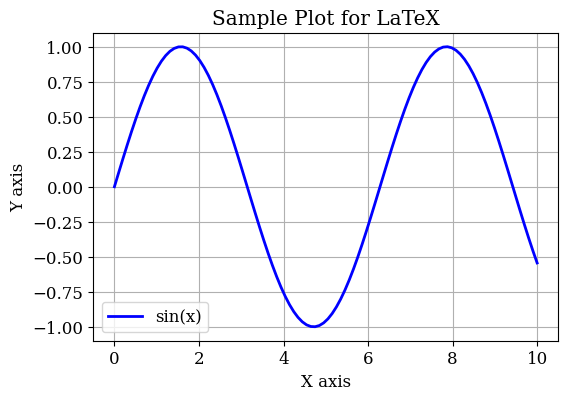

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams['text.usetex'] = True
# plt.style.use('seaborn-v0_8-notebook')
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='sin(x)', color='blue', linewidth=2)
plt.title('Sample Plot for LaTeX')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.grid(True)
plt.show()


LOAD DATA

In [82]:
with open("data/train.json", 'r') as f:
    train_data = json.load(f)

with open("data/validation.json", 'r') as f:
    validation_data = json.load(f)
    
with open("data/test.json", 'r') as f:
    test_data = json.load(f)


# ================= LOAD DATASET ===========================
train_articles = [article['article'] for article in train_data]
train_summaries = [article['summary'] for article in train_data]
train_summaries = [summary.replace('\n', ' ') for summary in train_summaries]

val_articles = [article['article'] for article in validation_data]
val_summaries = [article['summary'] for article in validation_data]
val_summaries = [summary.replace('\n', ' ') for summary in val_summaries]

test_articles = [article['article'] for article in test_data]
test_summaries = [article['summary'] for article in test_data]
test_summaries = [summary.replace('\n', ' ') for summary in test_summaries]



In [87]:
TOKENIZER_TYPE = "bpe"
combined_data = train_articles + train_summaries
EMB_SIZE = 512

tokenizer = CustomTokenizer(tokenizer_type=TOKENIZER_TYPE, combined_data=combined_data, vocab_size=10000, min_frequency=2, emb_size=EMB_SIZE)

In [92]:
tokenizer.tokenizer.encode('Everyone in L90 loves transformers.').tokens

['Every', 'one', 'Ġin', 'ĠL', '90', 'Ġloves', 'Ġtransform', 'ers', '.']

In [93]:
tokenizer.tokenizer.encode('Everyone in L90 loves transformers.').ids

[5704, 505, 283, 381, 6520, 8472, 6435, 366, 13]

In [69]:
lengths_articles_chars = [len(article) for article in train_articles]
lengths_summaries_chars = [len(summary) for summary in train_summaries]

lengths_articles_tokens = [len(tokenizer.text_to_tensor(article))-2 for article in tqdm(train_articles)]
lengths_summaries_tokens = [len(tokenizer.text_to_tensor(summary))-2 for summary in tqdm(train_summaries)]

100%|██████████| 10000/10000 [00:01<00:00, 6041.24it/s]


LENGTH OF DATA

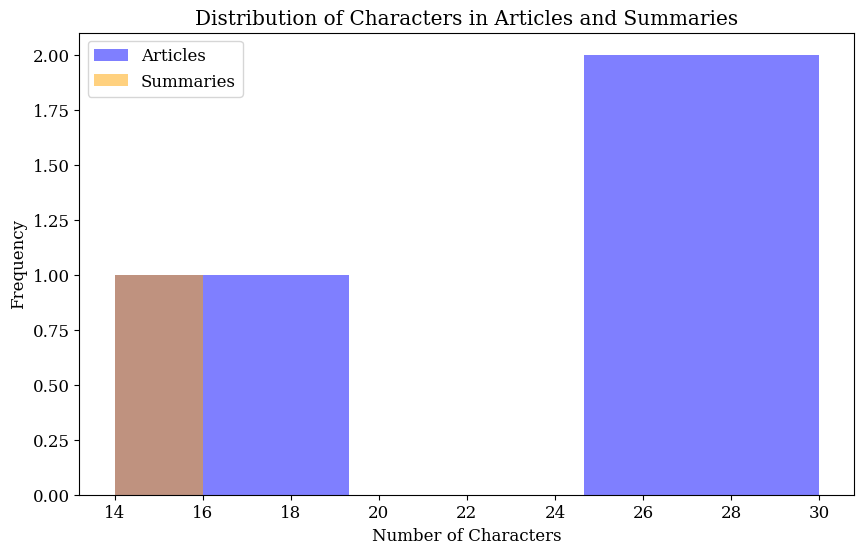

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for demonstration
train_articles = ["This is a sample article.", "Another example of an article.", "Short article."]
train_summaries = ["Sample summary.", "Example summary.", "Short summary."]

# Calculate the length of each string in the lists
lengths_articles = [len(article) for article in train_articles]
lengths_summaries = [len(summary) for summary in train_summaries]

# Create the seaborn histogram without binning
plt.figure(figsize=(10, 6))
sns.histplot(lengths_articles, color="blue", alpha=0.5, label="Articles", edgecolor=None, bins=len(set(lengths_articles)))
sns.histplot(lengths_summaries, color="orange", alpha=0.5, label="Summaries", edgecolor=None, bins=len(set(lengths_summaries)))
plt.title("Distribution of Characters in Articles and Summaries")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.legend()
plt.show()


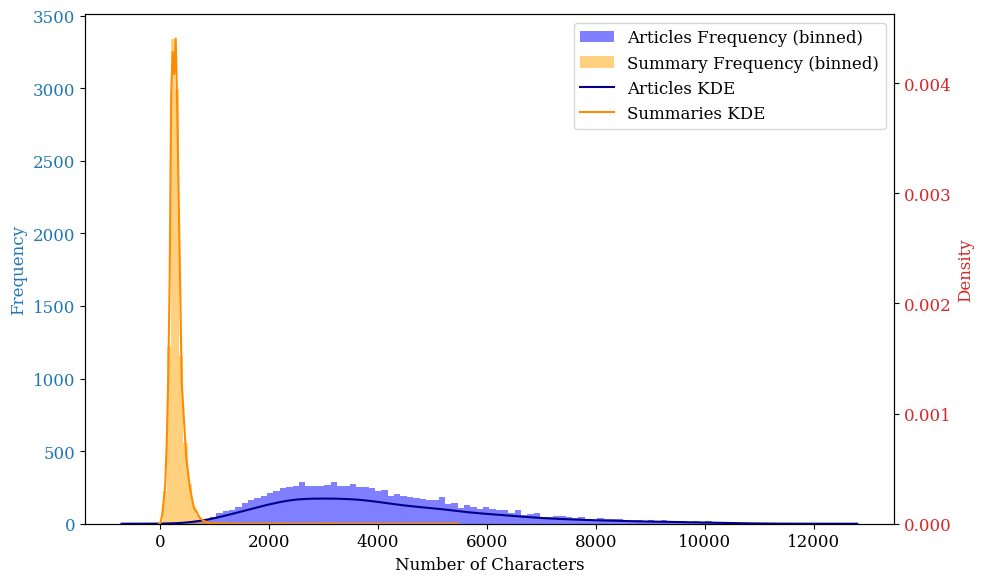

In [70]:
# Creating a combined plot with separate y-axes for histograms and KDE plots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set up the first axes (for histograms)
ax1.set_xlabel("Number of Characters")
ax1.set_ylabel("Frequency", color="tab:blue")
sns.histplot(lengths_articles_chars, ax=ax1, color="blue", alpha=0.5, bins=100, edgecolor=None, label='Articles Frequency (binned)')
sns.histplot(lengths_summaries_chars, ax=ax1, color="orange", alpha=0.5, bins=70, edgecolor=None, label='Summary Frequency (binned)')
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Set up the second axes (for KDE plots)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Density', color="tab:red")  # we already handled the x-label with ax1
sns.kdeplot(lengths_articles_chars, ax=ax2, color="darkblue", label="Articles KDE")
sns.kdeplot(lengths_summaries_chars, ax=ax2, color="darkorange", label="Summaries KDE")
ax2.tick_params(axis='y', labelcolor="tab:red")

# Title and legend
# plt.title("Distribution of Characters in Articles and Summaries")
fig.tight_layout()  # to ensure the right y-label is not clipped
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()



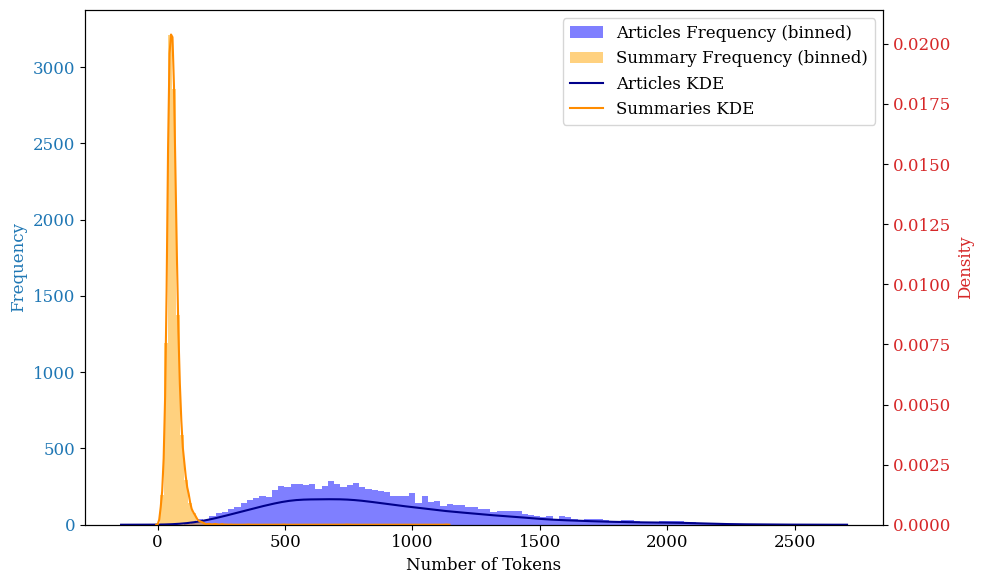

In [71]:
# Creating a combined plot with separate y-axes for histograms and KDE plots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set up the first axes (for histograms)
ax1.set_xlabel("Number of Tokens")
ax1.set_ylabel("Frequency", color="tab:blue")
sns.histplot(lengths_articles_tokens, ax=ax1, color="blue", alpha=0.5, bins=100, edgecolor=None, label='Articles Frequency (binned)')
sns.histplot(lengths_summaries_tokens, ax=ax1, color="orange", alpha=0.5, bins=70, edgecolor=None, label='Summary Frequency (binned)')
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Set up the second axes (for KDE plots)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Density', color="tab:red")  # we already handled the x-label with ax1
sns.kdeplot(lengths_articles_tokens, ax=ax2, color="darkblue", label="Articles KDE")
sns.kdeplot(lengths_summaries_tokens, ax=ax2, color="darkorange", label="Summaries KDE")
ax2.tick_params(axis='y', labelcolor="tab:red")

# Title and legend
fig.tight_layout()  # to ensure the right y-label is not clipped
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

In [74]:
np.mean(lengths_summaries_tokens)

62.4232

In [94]:
# Download the stopwords from NLTK
nltk.download('stopwords')
# Set of English stopwords
stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):
    # Tokenize the text
    words = re.findall(r'\b\w+\b', text.lower())
    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# Assuming train_articles and train_summaries are defined
tokenized_articles = [clean_and_tokenize(article) for article in train_articles]
tokenized_summaries = [clean_and_tokenize(summary) for summary in train_summaries]

# Combine all words from articles and summaries
all_words = list(chain.from_iterable(tokenized_articles + tokenized_summaries))

# Generate n-grams
bigrams = [' '.join(all_words[i:i+2]) for i in range(len(all_words)-1)]
trigrams = [' '.join(all_words[i:i+3]) for i in range(len(all_words)-2)]
fourgrams = [' '.join(all_words[i:i+4]) for i in range(len(all_words)-3)]
fivegrams = [' '.join(all_words[i:i+5]) for i in range(len(all_words)-4)]

[nltk_data] Downloading package stopwords to /home/timoh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
for lst in [all_words, bigrams, trigrams, fourgrams, fivegrams]:
    rprint(Counter(lst).most_common(30))

[
    ('said', 47012),
    ('one', 18002),
    ('year', 16958),
    ('people', 13773),
    ('also', 13426),
    ('new', 13350),
    ('two', 13120),
    ('would', 13068),
    ('time', 11417),
    ('last', 11174),
    ('police', 10535),
    ('years', 10507),
    ('told', 10255),
    ('first', 10213),
    ('could', 9502),
    ('mr', 9347),
    ('old', 8765),
    ('like', 8498),
    ('world', 8079),
    ('home', 8011),
    ('says', 7958),
    ('back', 7747),
    ('three', 7375),
    ('left', 7353),
    ('000', 7318),
    ('family', 7011),
    ('day', 6952),
    ('get', 6803),
    ('made', 6716),
    ('found', 6642)
]

[
    ('year old', 6323),
    ('per cent', 3057),
    ('new york', 2801),
    ('last year', 2695),
    ('united states', 1825),
    ('scroll video', 1580),
    ('last week', 1475),
    ('years ago', 1434),
    ('world cup', 1355),
    ('prime minister', 1351),
    ('2013 updated', 1220),
    ('first time', 1205),
    ('two years', 1134),
    ('last month', 1092),
    ('premier league', 1087),
    ('told cnn', 1068),
    ('last night', 840),
    ('white house', 815),
    ('los angeles', 795),
    ('daily mail', 792),
    ('police said', 787),
    ('manchester united', 698),
    ('contributed report', 664),
    ('said statement', 628),
    ('three years', 626),
    ('said would', 625),
    ('al qaeda', 610),
    ('human rights', 603),
    ('high school', 580),
    ('2012 updated', 579)
]

[
    ('daily mail reporter', 512),
    ('new york city', 457),
    ('president barack obama', 392),
    ('mail reporter published', 351),
    ('two years ago', 260),
    ('year old son', 237),
    ('year old daughter', 219),
    ('year old man', 210),
    ('year old girl', 206),
    ('louis van gaal', 206),
    ('21 year old', 198),
    ('year old boy', 196),
    ('cnn student news', 174),
    ('23 year old', 172),
    ('opinions expressed commentary', 171),
    ('expressed commentary solely', 170),
    ('17 year old', 168),
    ('28 year old', 168),
    ('27 year old', 168),
    ('video scroll watch', 167),
    ('16 year old', 167),
    ('14 year old', 166),
    ('25 year old', 164),
    ('new york times', 164),
    ('19 year old', 164),
    ('20 year old', 163),
    ('24 year old', 162),
    ('15 year old', 153),
    ('26 year old', 152),
    ('22 year old', 150)
]

[
    ('daily mail reporter published', 351),
    ('opinions expressed commentary solely', 170),
    ('sorry currently accepting comments', 146),
    ('currently accepting comments article', 146),
    ('prime minister david cameron', 118),
    ('told daily mail australia', 89),
    ('centers disease control prevention', 66),
    ('home secretary theresa may', 66),
    ('new york daily news', 64),
    ('sorry unable accept comments', 58),
    ('unable accept comments legal', 58),
    ('accept comments legal reasons', 58),
    ('president bashar al assad', 58),
    ('secretary state hillary clinton', 54),
    ('president george w bush', 51),
    ('vice president joe biden', 51),
    ('u n security council', 47),
    ('attorney general eric holder', 47),
    ('prime minister benjamin netanyahu', 44),
    ('labour leader ed miliband', 44),
    ('secretary state john kerry', 43),
    ('russian president vladimir putin', 42),
    ('u president barack obama', 40),
    ('house speaker john boehner', 40),
    ('time inc rights reserved', 39),
    ('national transportation safety board', 38),
    ('first lady michelle obama', 38),
    ('martin luther king jr', 36),
    ('told new york post', 35),
    ('mail reporter published 10', 35)
]

[
    ('sorry currently accepting comments article', 146),
    ('sorry unable accept comments legal', 58),
    ('unable accept comments legal reasons', 58),
    ('daily mail reporter published 10', 35),
    ('matt chorley mailonline political editor', 34),
    ('click try 2 risk free', 33),
    ('try 2 risk free issues', 33),
    ('2 risk free issues entertainment', 33),
    ('risk free issues entertainment weekly', 33),
    ('entertainment weekly time inc rights', 33),
    ('weekly time inc rights reserved', 33),
    ('senate majority leader harry reid', 32),
    ('free issues entertainment weekly 2011', 32),
    ('issues entertainment weekly 2011 entertainment', 32),
    ('entertainment weekly 2011 entertainment weekly', 32),
    ('weekly 2011 entertainment weekly time', 32),
    ('2011 entertainment weekly time inc', 32),
    ('ew com click try 2', 31),
    ('com click try 2 risk', 31),
    ('secretary general ban ki moon', 31),
    ('daily mail reporter last updated', 29),
    ('contributed report daily mail reporter', 29),
    ('daily mail reporter published 11', 29),
    ('continues sorry currently accepting comments', 29),
    ('currently accepting comments article cnn', 28),
    ('israeli prime minister benjamin netanyahu', 26),
    ('told new york daily news', 26),
    ('syrian president bashar al assad', 24),
    ('daily mail reporter published 12', 22),
    ('deputy prime minister nick clegg', 22)
]

In [54]:
for lst in [all_words, bigrams, trigrams, fourgrams, fivegrams]:
    rprint(Counter(lst).most_common(10))

[
    ('the', 415952),
    ('to', 201969),
    ('a', 178742),
    ('of', 171263),
    ('and', 171086),
    ('in', 155704),
    ('s', 82586),
    ('was', 71664),
    ('for', 69790),
    ('that', 67682)
]

[
    ('of the', 40385),
    ('in the', 37042),
    ('to the', 19393),
    ('on the', 15727),
    ('at the', 14586),
    ('for the', 12253),
    ('in a', 12149),
    ('to be', 11762),
    ('and the', 8965),
    ('it s', 8960)
]

[
    ('one of the', 3420),
    ('the u s', 2320),
    ('the united states', 1743),
    ('according to the', 1718),
    ('scroll down for', 1693),
    ('as well as', 1617),
    ('i don t', 1612),
    ('down for video', 1579),
    ('a lot of', 1347),
    ('it s a', 1218)
]

[
    ('scroll down for video', 1579),
    ('for the first time', 693),
    ('contributed to this report', 664),
    ('the end of the', 557),
    ('said in a statement', 545),
    ('at the end of', 524),
    ('by daily mail reporter', 487),
    ('in the united states', 477),
    ('one of the most', 474),
    ('in the u s', 452)
]

[
    ('by daily mail reporter published', 331),
    ('at the end of the', 266),
    ('contributed to this report by', 208),
    ('at the time of the', 183),
    ('in this commentary are solely', 180),
    ('this commentary are solely those', 180),
    ('commentary are solely those of', 180),
    ('the opinions expressed in this', 178),
    ('for the first time in', 171),
    ('opinions expressed in this commentary', 171)
]

In [91]:
lengths_summaries_sorted = sorted(lengths_summaries)
np.percentile(lengths_summaries_sorted, 75)

73.0

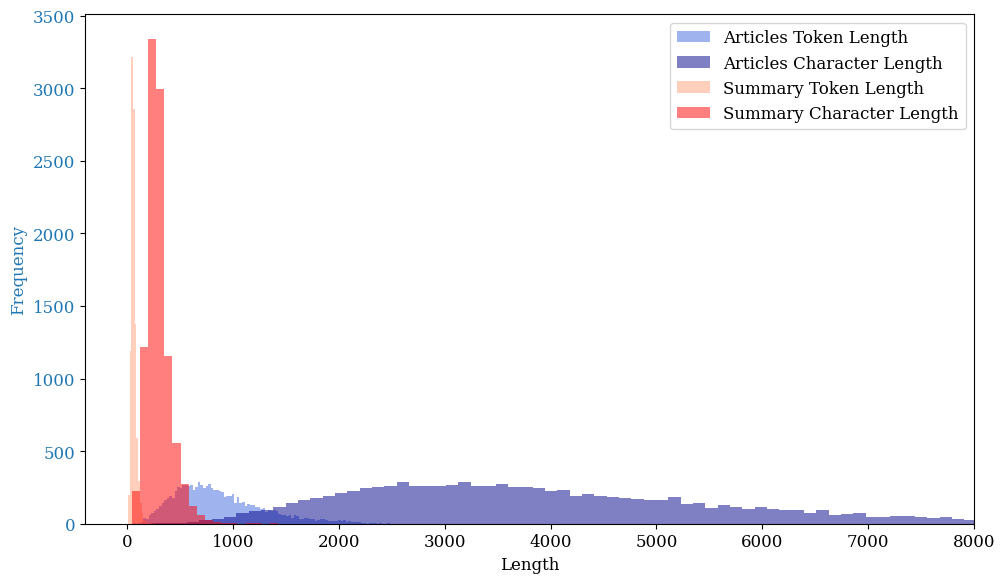

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


# Creating a combined plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set up the axes for histograms
ax.set_xlabel("Length")
ax.set_ylabel("Frequency", color="tab:blue")
sns.histplot(lengths_articles_tokens, ax=ax, color="royalblue", alpha=0.5, bins=100, edgecolor=None, label='Articles Token Length')
sns.histplot(lengths_articles_chars, ax=ax, color="darkblue", alpha=0.5, bins=100, edgecolor=None, label='Articles Character Length')
sns.histplot(lengths_summaries_tokens, ax=ax, color="lightsalmon", alpha=0.5, bins=70, edgecolor=None, label='Summary Token Length')
sns.histplot(lengths_summaries_chars, ax=ax, color="red", alpha=0.5, bins=70, edgecolor=None, label='Summary Character Length')
ax.tick_params(axis='y', labelcolor="tab:blue")

# Adjusting layout and adding legend
fig.tight_layout()
ax.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
ax.set_xlim(-400, 8000)

plt.show()

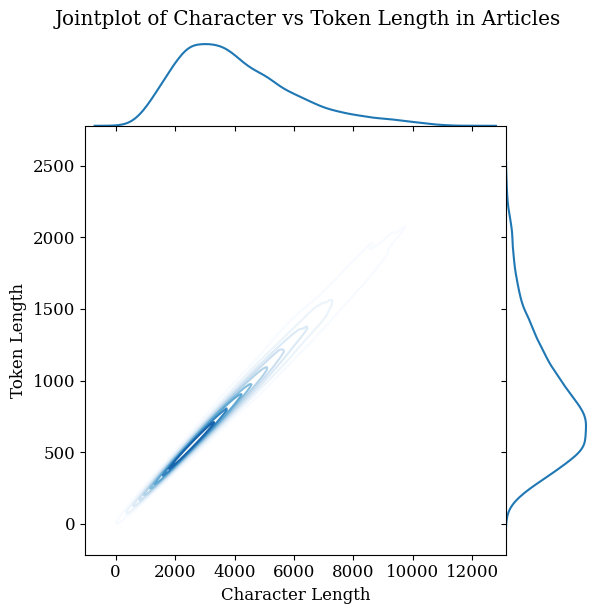

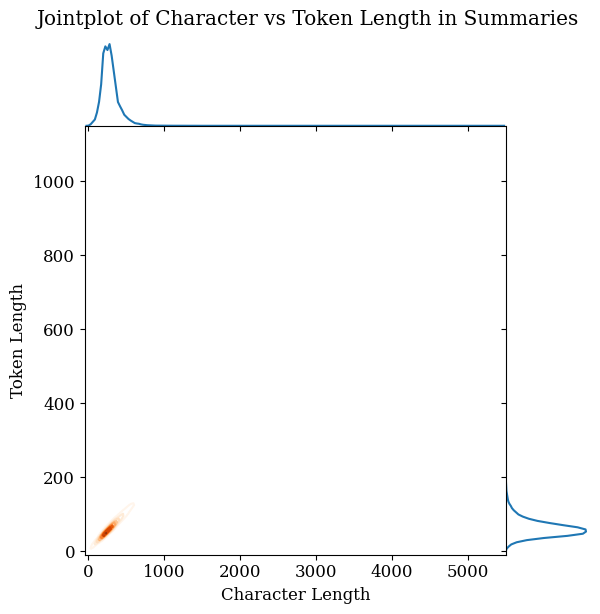

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


# Creating a DataFrame for articles
import pandas as pd
data_articles = pd.DataFrame({
    'Character Length': lengths_articles_chars,
    'Token Length': lengths_articles_tokens
})

# Creating a DataFrame for summaries
data_summaries = pd.DataFrame({
    'Character Length': lengths_summaries_chars,
    'Token Length': lengths_summaries_tokens
})

# Creating a jointplot for articles
sns.jointplot(data=data_articles, x="Character Length", y="Token Length", kind="kde", cmap="Blues", space=0)
plt.suptitle("Jointplot of Character vs Token Length in Articles", y=1.02)
plt.show()

# Creating a jointplot for summaries
sns.jointplot(data=data_summaries, x="Character Length", y="Token Length", kind="kde", cmap="Oranges", space=0)
plt.suptitle("Jointplot of Character vs Token Length in Summaries", y=1.02)
plt.show()


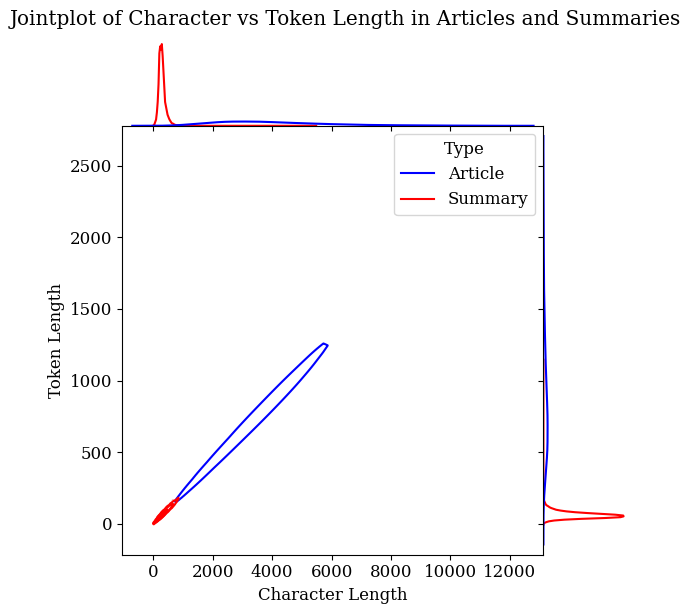

In [28]:
data_articles = pd.DataFrame({
    'Character Length': lengths_articles_chars,
    'Token Length': lengths_articles_tokens,
    'Type': 'Article'
})

# Creating a DataFrame for summaries with a type label
data_summaries = pd.DataFrame({
    'Character Length': lengths_summaries_chars,
    'Token Length': lengths_summaries_tokens,
    'Type': 'Summary'
})

# Combining the data into one DataFrame
combined_data = pd.concat([data_articles, data_summaries])

# Creating a jointplot for the combined data
sns.jointplot(data=combined_data, x="Character Length", y="Token Length", kind="kde", hue="Type", palette={"Article": "blue", "Summary": "red"}, space=0)
plt.suptitle("Jointplot of Character vs Token Length in Articles and Summaries", y=1.02)
plt.show()

## Topic Analysis

In [6]:
from bertopic import BERTopic
topic_model = BERTopic()

In [7]:
topics, probabilities = topic_model.fit_transform(train_articles)

In [9]:
probabilities

array([0.       , 1.       , 1.       , ..., 0.2245891, 1.       ,
       0.       ])

In [11]:
# Get an overview of the topics that BERTopic found
topic_info = topic_model.get_topic_info()
topic_info


,Topic,Count,Name,Representation,Representative_Docs
0,-1,3704,-1_the_to_and_of,"[the, to, and, of, in, that, for, was, is, on]","[(CNN) -- Once again, the nation is outraged ..."
1,0,468,0_her_police_was_she,"[her, police, was, she, he, said, had, his, fo...",[(CNN) -- A 19-year-old gunman who killed eigh...
2,1,196,1_her_she_hospital_was,"[her, she, hospital, was, had, condition, doct...","[By . Claire Bates . PUBLISHED: . 12:26 EST, 3..."
3,2,151,2_plane_flight_aircraft_passengers,"[plane, flight, aircraft, passengers, airport,...",[(CNN) -- (CNN) -- Malaysia Airlines flight ca...
4,3,143,3_zoo_species_animals_birds,"[zoo, species, animals, birds, animal, the, th...","[HOHENWALD, Tennessee (CNN) -- A pair of Afric..."
...,...,...,...,...,...
149,148,10,148_kennedy_kennedys_jackie_morgan,"[kennedy, kennedys, jackie, morgan, irish, jfk...",[(CNN) -- It may be months before Edward Kenne...
150,149,10,149_odegaard_castel_real_madrid,"[odegaard, castel, real, madrid, di, hernandez...",[(CNN) -- Meet football's answer to Tintin. He...
151,150,10,150_brain_bina48_infrared_color,"[brain, bina48, infrared, color, activity, dre...",[(CNN) -- I come from a place where the sky is...
152,151,10,151_knox_casey_kercher_mason,"[knox, casey, kercher, mason, caseys, llorens,...",[By . Daily Mail Reporter . PUBLISHED: . 12:06...


6296


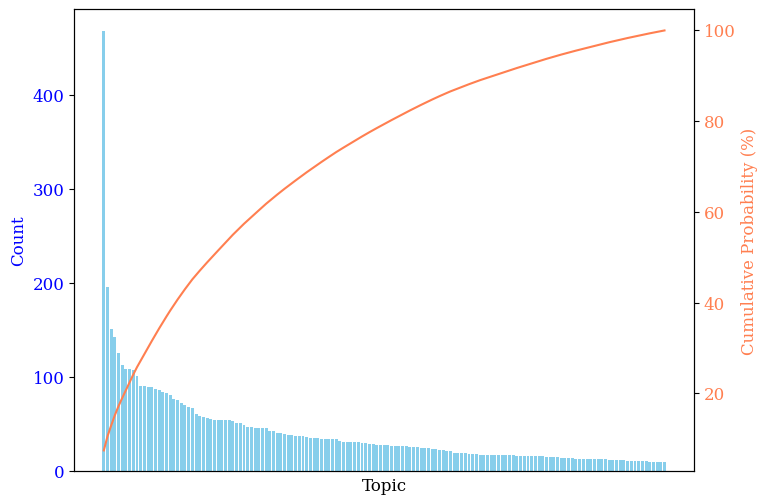

In [55]:

# Truncating the first row and sorting by 'Count' in descending order
topic_info_trunc = topic_info.iloc[1: , :]
sorted_topic_info = topic_info_trunc.sort_values(by='Count', ascending=False)
print(sorted_topic_info['Count'].sum())

# Calculating cumulative probability
sorted_topic_info['Cumulative'] = sorted_topic_info['Count'].cumsum()
total_count = sorted_topic_info['Count'].sum()
sorted_topic_info['Cumulative Probability'] = sorted_topic_info['Cumulative'] / total_count * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(8,6))

# Bar plot for counts
ax1.bar(sorted_topic_info['Topic'].astype(str), sorted_topic_info['Count'], color='skyblue')
ax1.set_xlabel('Topic')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks([])  # Removes x-axis labels

# Adding a secondary y-axis for cumulative probability
ax2 = ax1.twinx()
ax2.plot(sorted_topic_info['Topic'].astype(str), sorted_topic_info['Cumulative Probability'], color='coral', marker=None)
ax2.set_ylabel('Cumulative Probability (%)', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# plt.title('BERTTopic Counts Distribution')
plt.show()

In [58]:
sorted_topic_info['Count'][:35].cumsum()

1      468
2      664
3      815
4      958
5     1084
6     1197
7     1306
8     1415
9     1523
10    1624
11    1715
12    1806
13    1896
14    1986
15    2074
16    2161
17    2245
18    2328
19    2409
20    2486
21    2562
22    2635
23    2706
24    2775
25    2842
26    2903
27    2962
28    3020
29    3077
30    3133
33    3188
31    3243
34    3298
35    3353
32    3408
Name: Count, dtype: int64

In [46]:
for i in range(len(topic_info)):
    print(f"{i+1} & {topic_info['Count'][i]} & {topic_info['Representation'][i]} \\")
    # print(topic_info['Representative_Docs'][i])

1 & 3704 & ['the', 'to', 'and', 'of', 'in', 'that', 'for', 'was', 'is', 'on'] \
2 & 468 & ['her', 'police', 'was', 'she', 'he', 'said', 'had', 'his', 'found', 'and'] \
3 & 196 & ['her', 'she', 'hospital', 'was', 'had', 'condition', 'doctors', 'my', 'cancer', 'to'] \
4 & 151 & ['plane', 'flight', 'aircraft', 'passengers', 'airport', 'airlines', 'air', 'pilot', 'airline', 'crash'] \
5 & 143 & ['zoo', 'species', 'animals', 'birds', 'animal', 'the', 'they', 'it', 'bear', 'wildlife'] \
6 & 126 & ['dog', 'dogs', 'animal', 'pet', 'animals', 'her', 'owner', 'was', 'she', 'owners'] \
7 & 113 & ['fashion', 'her', 'dress', 'kate', 'she', 'style', 'and', 'collection', 'look', 'with'] \
8 & 109 & ['mr', 'labour', 'party', 'miliband', 'cameron', 'minister', 'prime', 'tory', 'election', 'leader'] \
9 & 109 & ['car', 'crash', 'driving', 'was', 'accident', 'driver', 'her', 'she', 'road', 'scene'] \
10 & 108 & ['apple', 'iphone', 'google', 'app', 'apples', 'glass', 'mobile', 'devices', 'phone', 'apps'] 

## Interesting Cases

### M model full dataset

Hallucinating Kim Kardashion for Kim Sears (Andy Murray wife)

**Input article**: She has a reputation for being a ‘pushy parent’ and with some newly acquired dance moves under her belt, she might have been expected to muscle in. But it emerged yesterday that when Andy Murray and his new bride had their first dance on Saturday night, Judy Murray was strictly on the sidelines. The former star of Strictly Come Dancing – who frequently failed to impress the judges with her efforts – left the newlyweds to it as they took to the floor at their reception in Cromlix House Hotel, following their wedding at Dunblane Cathedral in the afternoon. Scroll down for video . Love match: Andy and Kim after the ceremony at Dunblane Cathedral (left). Judy Murray (pictured right during Strictly Come Dancing) says she is 'terrible' at dancing . As Judy’s mother, Shirley Erskine, 80, left the venue, she admitted the wedding of Andy, 27, to his long-term girlfriend Kim Sears, also 27, had been ‘fantastic’ and ‘wonderful’. She added: ‘We’ve just all been up there together and everybody’s parting in dribs and drabs, so we’re on the way home.’ But neither she, nor Andy’s grandfather Roy, were able to recall what the couple’s first dance was. Mr Erskine, 83, said: ‘It was something with music anyway. They actually did go out for the first dance.’ They also confirmed that Mrs Murray did not take to the dance floor first and let the bride and groom lead the evening’s festivities at Cromlix, the luxury hotel bought by Andy in 2013 for £1.8million, and where his brother had also held his wedding reception. Mrs Erskine also said that the newlyweds would not be going on honeymoon ‘until later’ in the year. The bride dazzled in a pretty flowing silk chiffon gown by designer Jenny Packham, while her husband opted for traditional Scots dress to tie the knot. And as for the mother-of-the-groom, 55-year-old Mrs Murray wore a white dress coat, which was belted at the waist. Just a few hours earlier, she was resplendent in a stunning white dress coat and eye-catching hat. But the morning after her younger son’s wedding, Judy Murray had slipped into something more comfortable – her favoured old blue tracksuit. The morning after her younger son’s wedding, Judy Murray had slipped into something more comfortable – her favoured old blue tracksuit . After admitting to focusing more on her outfits following her appearance on Strictly Come Dancing last year, Mrs Murray, 55, broke with tradition on Saturday by wearing a white coat, the same colour, as the stunning Jenny Packham gown worn by bride, Kim Sears. But it was back into the sports gear when she left Cromlix House yesterday. Beneath, Mrs Murray opted for a nude pencil skirt and lace top as well as a hat by Scottish milliner William Chambers that resembled an oversized fascinator. In an interview last year to promote her appearance on the hit BBC show Strictly, Mrs Murray said that despite raising two tennis stars – her son, Jamie, 28, is a Wimbledon doubles champion – she is not a pushy parent. She said: ‘I’ve definitely been pigeon-holed as pushy and overbearing but if you ask any of my friends or family, I’m all about having fun. ‘My children would tell you exactly the same.’ And although she admitted to being a terrible dancer, she said she ‘absolutely loved’ the programme and being part of the competition.She added: ‘I’m terrible, I don’t know if it’s my age but I just can’t remember the steps.’ Mrs Murray, 55 (pictured left with Will Murray) broke with tradition on Saturday by wearing a white coat, the same colour as the stunning Jenny Packham gown worn by bride, Kim Sears (right) The bride and groom were cheered and showered with confetti as the left the cathedral in Andy’s hometown after the 45-minute ceremony, which went ahead smoothly despite earlier showers of hail and snow. Hundreds of well-wishers had gathered outside to catch a glimpse of the happy couple. Clearly unable to contain his excitement in the run-up to his love match, Andy had posted a tweet to his 2.98million followers which showed his plans for the day – through the use of emojis. He tweeted an umbrella, a picture of a church, a ring, a kiss, cake, drinks including beer, cocktails and wine and ending with hearts, a face blowing a kiss and several Zzzz icons for sleep. Meanwhile, Judy earlier expressed some apprehension over the weather, initially tweeting, ‘Hailstones. Marvellous,’ and then: ‘Snowing. White wedding.’

**Gold label summary**: Judy Murray left newlyweds to it as they took to floor for their first dance . Former Strictly star previously admitted to being a 'terrible' dancer . Andy and Kim, both 27, had reception in Cromlix House Hotel, after service at Dunblane Cathedral .

**Generated summary**: Andy Murray was attending the wedding party at the Royal Garden Hotel in north-west Launton, Berkshire . Former girlfriend Kim Kardashian said she was 'not happy' at wedding . She was seen leaving the wedding party with Kim Kardashian and her husband


Repetition - when trained on just ONE epoch!

**Gold label summary:** Gunmen opened fire as Scott Calder picked his mother Marie up after bingo . Marie, 56, was shot in the elbow while son Scott, 22, was struck on the wrist . Pair were blocked into car park before two men fired shots at them . Family managed to escape and made their way to hospital on foot . Detectives working on theory that Mr Calder was the intended target . Marie could have been caught in the crossfire . Police investigating reports of a family dispute involving Mr Calder .

**Generated summary:** Police have been arrested in the face of a car in the face of a car . The man was shot in the head and was shot in the head . The man was shot in the head and was arrested in the head .

Repetition

**Input article no.40**: The Premier League returns this weekend after the fourth interruption this season for international fixtures, leaving managers hoping their players have returned with a clean bill of health. The break can be both a blessing and a curse, potentially halting your momentum if results and confidence are positive, or halting your slide if all is not well. Premier League sides have already had to resume their season after international breaks in September, October and November 2014. Premier League leaders Chelsea have won all three of their matches following the international break . Everton lead the post-international Premier League table with three wins from three after the break . However six Premier League clubs are still chasing their first win after an international break this season, so who has been the best at managing this transition? Sportsmail examines this through a modified Premier League table that takes in only results immediately after international resumptions. Our alternative table makes nice reading for Toffees fans, with their side winning all three matches and keeping clean sheets against Aston Villa and West Brom. Champions-elect Chelsea are the only side to match this perfect record, though both of these teams have not faced a current top seven team across their post-international fixtures. Southampton and both Manchester clubs are the only other unbeaten sides though United did slip up in drawing 2-2 at home to West Brom. Manchester City have been relatively impressive, drawing 2-2 at the Emirates and most notably dispatching Champions League chasing Tottenham 4-1, who have an indifferent record. Moving further down and Liverpool have a significantly worse record following the international break than in overall form, suffering surprise defeats when visiting Crystal Palace and hosting Aston Villa. Moreover their only win came through an unconvincing 3-2 victory at Queens Park Rangers, secured only through a sensational second-half display by Raheem Sterling. Manchester United will be hoping to follow up their win against Liverpool by beating Aston Villa . Arsenal are awaiting their first Premier League win directly following an international break . Brendan Rodgers (right) will be hoping his side can pile more post-international misery on Arsenal . Saturday . Arsenal vs Liverpool . Everton vs Southampton . Leicester vs West Ham . Manchester United vs Aston Villa . Swansea vs Hull . West Brom vs QPR . Chelsea vs Stoke . Sunday . Burnley vs Tottenham . Sunderland vs Newcastle . Monday . Crystal Palace vs Manchester City . Both the Reds and Arsenal will want to change the vast discrepancies between their current league table positions and their positions in our alternative view, currently sitting in eighth and 13th respectively. The two Champions League sides meet on Saturday lunchtime as Arsenal chase a first win following an international break this season. The Gunners have been fortunate in having three home fixtures but have totally failed to capitalise on this, drawing 2-2 with Hull City and Manchester City, whilst losing 2-1 at the hands of Manchester United. Southampton have handed out two thrashings to sides in the North-East by picking up 8-0 and 4-0 wins over Sunderland and Newcastle respectively. However in this table the Toon still make the top six through narrow 1-0 wins over both QPR and Leicester. The Foxes have a notably improved position whilst keeping clean sheets against Sunderland and Stoke in their three post-international games, despite these being relatively rare across the season. Relegations strugglers QPR have lost all three of their post-international fixtures so far this season . This puts Nigel Pearson’s side comfortably nestled in mid-table, joined their relegation strugglers Burnley. Possibly benefitting from having fewer players occupied on international duty, both join a cluster of teams on four points. Stoke will also be concerned by their poor record, which includes 2-1 and 1-0 defeats when hosting relegation-threatened sides Burnley and Leicester City. Such results across an entire campaign may have seen them struggling to maintain mid-table stability under Mark Hughes. Hull City, Sunderland and West Brom are all winless, though the Black Cats did claim a respectable 2-2 draw at home to Tottenham. Swansea City and QPR are both pointless, though the Swans have had three games including difficult trips to Chelsea and Manchester City. Meanwhile the R’s have hosted Liverpool whilst suffering away defeats with scoring at both Newcastle and Manchester United – Chris Ramsey’s team will hope to change that trend when travelling to West Brom on Saturday.

**Gold label summary**: Everton and Chelsea have perfect records with three wins each . Southampton, Man City and Man United are the only other unbeaten sides . Arsenal are still yet to win following an international break this season . Liverpool are similarly poor with one win and two defeats . Six clubs are yet to win after an international break, find out who here… .

**Generated summary**: The midfielder will miss Premier League on Saturday morning in the Premier League . But the Premier League games have been in the Premier League . But he will be seen as Chelsea in their final . But the Premier League game as Liverpool were made by the Premier League .


topic hallucination

**Input article no.31**: (Billboard)The key to rock's longevity is it never defines itself into irrelevance. So while there were some loud, dirty guitars at the 2015 Rock and Roll Hall of Fame induction ceremony in Cleveland on Saturday night, there was as much recognition for rock's antecedents in soul and blues, speaking less to a particular taxonomy than a spirit that's beyond words. It's easy to talk of such spirit when Paul McCartney is there to honor Ringo Starr, and Yoko Ono is on hand as well. Speaking briefly backstage, Ono expressed feeling that it was wonderful for Starr to be honored, "just sad John and George aren't here," referring to her late husband John Lennon and Beatles guitarist and fellow songwriter George Harrison. Starr was certainly happy to be there — after a long wait, he's the final Beatle to be inducted as a solo act. "I've finally been invited, and I love it," said the 74-year-old drummer. "I got lucky, and it was actually in Cleveland," he said to enormous applause. Fifty-one years earlier, Starr had been in town to play the very same Hall; he admitted backstage that he didn't remember the cops stopping the show during "All My Loving" and making the Beatles return to the dressing room for ten minutes until the fans could be calmed. Starr said in a backstage interview that he couldn't recall the incident specifically, but admitted that there had been a lot of shows in between. "I'll remember this one," he promised. Others receiving Rock Hall honors included Paul Butterfield Blues Band, early soul act The 5 Royales, singer Bill Withers, punk rockers Green Day, Lou Reed, Joan Jett & the Blackhearts and Stevie Ray Vaughan. It was a night for the young to honor the old and perhaps prepare for a later visit. John Mayer hailed his longtime idol, the late Vaughan, in a heartfelt speech. John Legend came out to honor Bill Withers with a performance of "Use Me" backed by Stevie Wonder, who inducted Withers. The two then shared "Lean on Me," until Legend went and pulled Withers to the front of the stage to join them. Beck, Yeah Yeah Yeahs, Bill Withers, Seymour Stein hit Rock Hall's weekend festivities . The 76-year old soul legend hasn't performed live in many years but had hinted in the months leading up to the induction ceremonies that he might sing once more. Withers sounded great, though he may have an even brighter future in stand-up. "This has got to be the biggest AA meeting [in the] Western hemisphere," said Withers, alluding to an earlier moment in the show when Jimmie Vaughan confessed, "I taught my brother guitar, and he taught me how to get sober." He called being inducted by Wonder, "A lion holding the door for a kitty cat." The moment of relative levity was welcome after moving tributes paid to the late Lou Reed by Patti Smith and Reed's widow, music artist Laurie Anderson, who shared the three rules for life that they came up with: "One: don't be afraid of anyone; Two: get a really good b------t detector and learn how to use it; Three: be really, really tender." Smith had to push back tears on at least three occasions. She recalled a night when they wound up in the same hotel and Reed invited her up. She found him in the tub dressed in black and she sat on the toilet and talked with him. Green Day was inducted by Fall Out Boy, who referenced the length of some of the speeches. Cracked Fall Out Boy frontman Patrick Stump: "I feel like I'm in a line at the DMV." As one of the youngest acts, it's not surprising they gave one of the two most exciting performances of the evening. Rock Hall induction ceremony: Lou Reed 'would be amused,' says sister . The other belonged to Tom Morello, Doyle Bramhall II and Zac Brown with harmonica player Jason Ricci performing "Born in Chicago" in tribute to the Paul Butterfield Blues Band. Not only did Ricci slay, but Morello played a nasty scabrous solo that raised the hairs on your arm, it was so alive. Miley Cyrus inducted Joan Jett in her own inimitable way, recalling a time she walked in on Jett smoking pot and being so turned on by her strength, wisdom and soul that the young pop star wanted to have sex with the legendary rocker. Jett joined the Blackhearts and Foo Fighters' Dave Grohl for a mini-set that include such classics as "Bad Reputation," the Runaways' "Cherry Bomb" and "Crimson and Clover," the Tommy James & the Shondelles cover that Jett took to No. 1. It was that kind of a night, and it closed with a rousing version of the Beatles' "I Want to Be Your Man," where just about everybody who could make it out on stage did, including a near-end guitar scrum/lead-off between Gary Clark Jr., Morello, Zac Brown and Yeah Yeah Yeahs' Nick Zinner. ©2015 Billboard. All Rights Reserved.

**Gold label summary**: Paul McCartney honors Ringo Starr at Rock and Roll Hall of Fame induction ceremony . Green Day, Lou Reed, Joan Jett & the Blackhearts also honored .

**Generated summary**: The former White House in March, with the same day . His wife, the same day before his own-of-two, was made over a year . The White House is also in the U.S. and will be a decade .

hallucination

**Input article no.2**: Saracens director of rugby Mark McCall lauded his young guns after their latest European heartache before declaring he has no intention of overspending in a competitive post-World Cup transfer market. McCall watched his side, which contained five English-qualified forwards in the starting pack, battle in vain before losing 13-9 to the Clermont on Saturday. Saracens’ millionaire chairman Nigel Wray spent much of last week repeating his belief the cap should be scrapped in order for Saracens to compete at Europe’s top table, raising expectations they could be set to land a ‘marquee’ player from outside the league whose wages would sit outside next season’s £5.5m cap. Maro Itoje (second left) was one of five England-qualified forwards in the Saracens pack that faced Clermont . Mako Vunipola tries to fend off Clermont lock Jamie Cudmore during a ferocious contest . Saracens director of rugby Mark McCall saw his side come agonisingly close to reaching the final . But McCall said: ‘We know where we’d like to improve our side and we’re prepared to wait for the right person. We don’t want to jump in and get “a name” just because he’s available post-World Cup. 'The fact our pack is as young as it is is incredibly exciting for us. They could be the mainstay of the club for the next four to five seasons.’ Billy Vunipola (left), Jim Hamilton and Itoje leave the field following their 13-9 loss against Clermont .

**Gold label summary**: Saracens lost 13-9 to Clermont at Stade Geoffroy-Guichard on Saturday . The Sarries pack contained five English-qualified forwards . Saracens’ millionaire chairman Nigel Wray wants the salary cap scrapped .

**Generated summary**: Cristiano Ronaldo has been at the last summer . He has been in the world champion for £1.5million . The team has not seen at a year since his job . The top of the top of the first year in the last week .

### Small Model limited dataset

#### Lewis Hamilton is never mentioned. Perhaps FA was confused for FIA?

**Input article no.44**: The FA Cup, the oldest knockout football competition in the world, is set to be rebranded as the Emirates FA Cup in a new £30million sponsorship deal . In a move that will upset traditionalists, the FA are understood to have secured a three-year contract with Emirates Airlines. The deal, due to be rubber-stamped by the FA board on Thursday, is believed to be worth at least £10million a year — but comes at a cost for lovers of the 144-year-old competition. Arsenal won last season's FA Cup competition, which will be rebranded the Emirates FA Cup . Aston Villa will face the holders Arsenal in this season's final at Wembley Stadium . Renaming it the Emirates FA Cup is a lot closer to title sponsorship than the previous ‘in association with Budweiser’ agreement, which was worth £9m annually. But the FA, after a highly embarrassing season without any Cup backer that has put huge pressure on their commercial department, needed to offer more to attract a significant sponsor to the table. The hunt proved hugely difficult even after the FA revamped their sponsorship team to bring in expertise honed at Manchester United. And it needed a bit of luck to attract Emirates Airlines, who have a massive sports sponsorship portfolio across the world that includes Arsenal’s stadium and kit. Emirates have big money to spend after deciding last November not to renew their £30m-a-year FIFA sponsorship for the 2018 and 2022 World Cups with the corruption allegations surrounding those tournaments said to be a consideration. And Emirates are no longer involved, either, in the tender for a Champions League airline sponsor, allowing the FA to offer a major football sponsorship alternative. Dubai-based Emirates have their arch Abu Dhabi airline rivals Etihad as Manchester City’s kit and stadium sponsors. But City foresee no problems with an Emirates FA Cup. Villa beat Liverpool in their semi-final to deny Steven Gerrard (centre) the chance of a final trophy . The new FA deal with Emirates will also allow for a further six subsidiary sponsors for the competition, with Budweiser, Nike and William Hill already signed up. And the ambition is for the whole FA Cup sponsorship portfolio to be worth £20m by 2018. The Emirates deal, likely to be officially announced nearer to the FA Cup final on May 30, is also well-timed for the FA’s commercial department with the new chief executive Martin Glenn arriving at Wembley next month.

**Gold label summary**: FA Cup is set to be named Emirates FA Cup as part of sponsorship deal . It is understood FA have agreed a three-year sponsorship deal with Airline . The agreement is due to be rubber-stamped on Thursday and will be worth at least £10million-per-year .

**Generated summary**: Lewis Hamilton will be a move for £1,000 in the last season . He will be seen on the season of £1.5m from the Premier League . But they are the £5m for £2,000 a year in the Champions League . The £1billion in the season of the last season-up of England's side .

**Input article no.46**: (CNN)German police overnight thwarted a terrorist plot by a radicalized couple, a plan they suspect involved bombing a bicycle race near Frankfurt, a German terrorism researcher briefed by investigators told CNN on Thursday. German prosecutors and police said that a man and a woman had been arrested in the Frankfurt-area town of Oberursel on suspicion of planning a Boston-style attack, but the authorities did not explicitly reveal the target. The suspected target, according to Florian Flade, the terrorism researcher, was a race planned for Friday. The race loops around Eshborn and Frankfurt on May Day each year, attracting large crowds of spectators along the cycle route. Prosecutor Albrecht Schreiber said police recovered a pipe bomb ready to be used, 100 rounds of 9mm ammunition, a gun, the essential parts of a G-3 assault rifle and 3 liters of hydrogen peroxide, which becomes explosive at high concentrations and has been used in multiple terror plots in the West, including the 2005 London bombings. Earlier Thursday, Andreas Hemmes, a spokesman for the police of West Hesse, told CNN that the house and car of two individuals in Oberursel, in the forested hills west of Frankfurt, had been searched. As a result of what had been found, police had expanded their search along the L3004 road on the bike race route, Hemmes said. "We suspect that there was a Salafist background," said Peter Beuth, the interior minister for Hesse, referring to ultra-fundamentalist interpretations of Islam. "Police investigations at this stage indicate that we have thwarted an Islamist attack." Flade, a journalist at Die Welt and terrorism researcher who first broke the story of the police raids, told CNN that a German couple of Turkish descent -- Halil and Senay D. -- were under arrest. He said the couple had ties to radical Islamist circles in the Frankfurt area. Neither is suspected of having direct links to the leadership of a terrorist group. Last week German police observed Halil D. moving in and out of a small forest near where he was living. They suspect he was looking for a good place to hide a bomb along the bike race route, according to Flade. Flade said that according to German police documents, German police first became aware of the couple at the end of March when they went to a garden center near Frankfurt to purchase hydrogen peroxide. He said the store employee contacted police after becoming suspicious for several reasons. The first was that the woman was covered in a full veil. The second was that the couple claimed they wanted to buy hydrogen peroxide to clean their fish pond in their garden, but the amount they were ordering would have been enough to clean dozens of such ponds. Furthermore, after police thwarted a bomb plot by German extremists trained in the tribal areas of Pakistan to kill American servicemen in Germany in September 2007 with hydrogen peroxide-based bombs -- the so-called "Sauerland" plot -- German law had required such stores to report to police significant purchases of hydrogen peroxide. According to Flade, after the tipoff, German investigators began trying to figure out who the couple were. All they had to go on was the surveillance footage. The woman was fully veiled and her male companion was blurry in the tape, so they did not immediately know who they were. But in early to mid-April they were able to identify them and start surveillance to investigate the couple's radical ties. According to Flade, German police established that the couple had recently traveled to Spain, where they met with members of Sharia4Spain, a radical pro-jihadist group linked to Al Muhajiroun in the United Kingdom. Spanish police had monitored the meeting in Spain. They also established that the couple had links to radicals who had gone to fight with AQIM, al Qaeda's North African affiliate . And they found the couple were in contact with a young radical Islamist from Frankfurt who had gone to fight in Syria at the end of last year and was recently killed. The pipe bomb that was recovered by police appears to have similarities to devices built by Boston Marathon bombers Tamerlan and Dzhokhar Tsarnaev. Flade said the device recovered near Frankfurt included nails as shrapnel. The Boston bombers downloaded instructions from a recipe in Inspire magazine, an online Engish language magazine put out by al Qaeda in Yemen, which has also been translated into German and other languages. In August 2013, the British security agency MI5 revealed to Parliament's intelligence and security committee that Inspire has been "read by those involved in at least seven out of the 10 attacks planned within the UK since its first issue (in 2010). We judge that it significantly enhanced the capability of individuals in four of these 10 attack plots." Like other European countries, Germany is grappling with an unprecedented terrorist threat because of the high number of its citizens who have traveled to Syria and Iraq. In recent years there has been growing concern over radicalization in Germany's large Turkish diaspora community. Travel to Syria is particularly easy for individuals of Turkish descent because Turkey is the entry point for most foreign fighters traveling to Syria. According to Flade, almost 700 Germans are believed to have traveled to Syria and Iraq, with up to 90% joining ISIS. One-third of these have returned to Germany and 70 to 80 have been killed in the fighting in Syria and Iraq. There has only been one fatal terrorist attack in Germany since 9/11 -- the shooting death of two U.S. airmen outside Frankfurt Airport by a lone-wolf radicalized Islamist in March 2011. CNN's Fred Pleitgen contributed to this report.

**Gold label summary**: German police say they think they "have thwarted an Islamist attack," interior minister for Hesse state says . German terrorism researcher: Couple accused of planning bomb attack on bicycle race near Frankfurt .

**Generated summary**: The U.S. military has been in Afghanistan since July . He said there are not to be a major since his death in 2010 .